# Lecture 6: BucketSort and RadixSort

In [3]:
from lecture6_aux import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import time

### First, we implement bucketSort. 

We are using a data structure defined in lecture6_aux for both the FIFO queues and for the things we put in them.

In [6]:
# A is a list to sort.
# A contains objects that have a "key" attribute, where "key" is between 0 and bucketMax - 1
def bucketSort(A, bucketMax=10):
    # initialize a separate queue for each bucket.  
    # myQueue is a simple queue class defined in the auxiliary python file.
    T = [ myQueue() for i in range(bucketMax) ] 
    for x in A:
        T[x.key()].push(x)
    # now return the concatenated buckets.
    ret = []
    for i in range(bucketMax):
        ret += T[i].getList()
    return ret
        

In [7]:
# sanity check
A = [myInt(x) for x in [5,4,3,2,1,2,3,4,5]]
print([ a.key() for a in bucketSort(A) ])

[1, 2, 2, 3, 3, 4, 4, 5, 5]


In [8]:
# radixSort can sort nDigit-long integers
# notice that if the base isn't 10 we probably shouldn't call these "digits," but oh well...
def radixSort(A, nDigits, base=10):
    # replace A with a list of "myInts" (from the lecture 6 auxiliary file).
    B = [ myInt(x, base=base) for x in A ]
    # now repeatedly run bucketSort
    for j in range(nDigits):
        # first update the digit that is the key
        for x in B:
            x.updateKeyDigit(j)
        # now do bucketSort on that digit
        B = bucketSort(B,bucketMax=base)
    # now B should be sorted!
    return B    

In [9]:
A = [523,123,4,33,12]
B = radixSort(A, 3, 10)
print([ b.getValue() for b in B ])

[4, 12, 33, 123, 523]


## What base should we use?

Below, we try out radixSort for many different values of base, and a few different choices of M, the largest element that may occur in the list that we're trying to sort.

In [10]:
# Here's a function which runs radixSort a bunch of times for a given n, M, and base.
def timeInBase(n, M, base, numTrials=400):
    nValues = []
    tValues = []
    runtime = 0
    for t in range(numTrials):
        lst = [ choice(range(M)) for i in range(n) ] # generate a random list of length n, no bigger than M
        start = time.time()
        # the number of digits is log_base(M)
        nDigits = int(np.ceil(np.log(M)/np.log(base)))
        radixSort( lst , nDigits, base=base)
        end = time.time()
        runtime += (end - start) * 1000 # measure in milliseconds
    runtime = runtime/numTrials
    return runtime

def generateData(n,M, bases):
    data = []
    for base in bases: 
        data.append( timeInBase(n,M,base) )
    return data

In [11]:
# generate a bunch of data for different values of n, M, and base.
# (Below we only have one choice for n, but if you want to play around you can add more.)
ns = [100]
Ms = [10,1000, 1000000, 1000000000]
bases = [2,4,6,8] + list(range(10, 100, 5)) + list(range(200, 400, 50))
datas = {}
for M in Ms:
    for n in ns:
        datas[(M,n)] = generateData(n,M,bases)


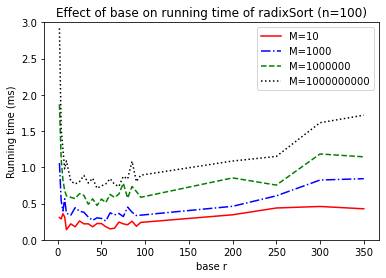

In [12]:
for n in ns:
    cols = ["red","blue","green","black"]
    styles = ["-", "-.", "--",":"]
    for i in range(len(Ms)):
        plt.plot( bases, datas[(Ms[i],n)], styles[i], color=cols[i], label="M=" + str(Ms[i]))
    plt.title("Effect of base on running time of radixSort (n=" + str(n) + ")")
    plt.xlabel('base r')
    plt.ylabel("Running time (ms)")
    plt.ylim([0,3]) ## useful for the plot that I got.
    plt.legend()
    plt.show()

In [13]:
# generate a bunch of data for different values of n, M, and base.
# (This time, we'll fix M and look at a few different n's)
ns2 = [50, 150, 250, 350]
Ms2 = [1000]
bases2 = [2,4,6,8] + list(range(10, 100, 5)) + list(range(200, 400, 50))
datas2 = {}
for M in Ms2:
    for n in ns2:
        datas2[(M,n)] = generateData(n,M,bases2)


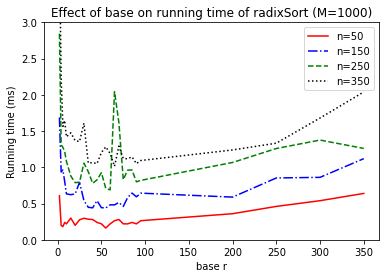

In [14]:
for M in Ms2:
    cols = ["red","blue","green","black"]
    styles = ["-", "-.", "--",":"]
    for i in range(len(ns2)):
        plt.plot( bases2, datas2[(M, ns2[i])], styles[i], color=cols[i], label="n=" + str(ns2[i]))
    plt.title("Effect of base on running time of radixSort (M=" + str(M) + ")")
    plt.xlabel('base r')
    plt.ylabel("Running time (ms)")
    plt.ylim([0,3]) ## useful for the plot that I got.
    plt.legend()
    plt.show()